# Dynex SDK - nBit Adder Native Gate Circuit Example

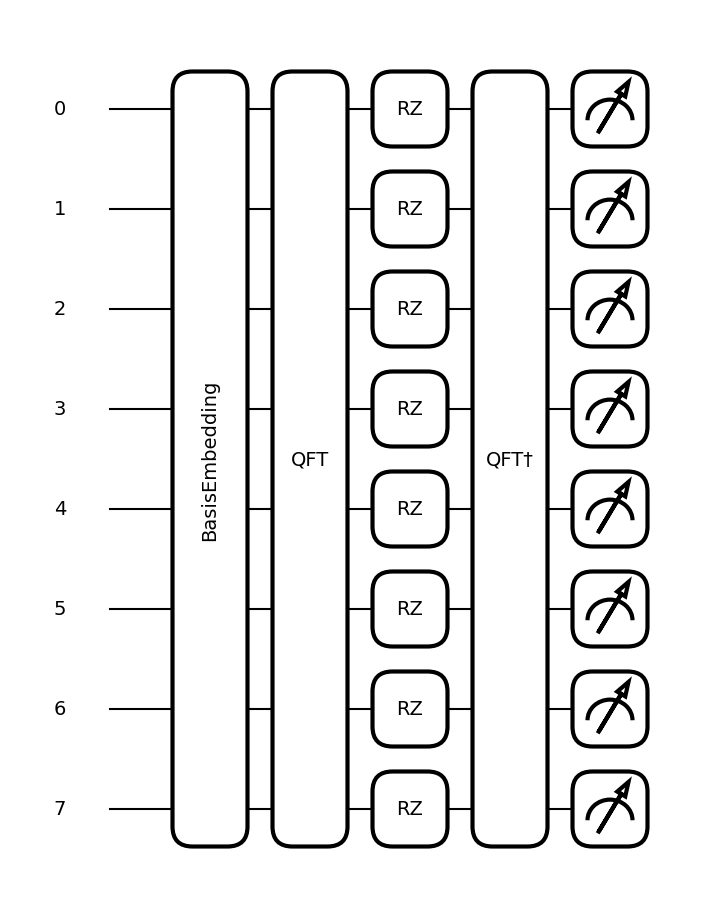

In [1]:
import pennylane as qml
import numpy as np
from pennylane_qiskit import AerDevice

# Parameters to add
params = [58, 142]

# Calculate the number of qubits
def Nqubits(a, b):
    mxVal = a + b
    return mxVal.bit_length()

wires = Nqubits(*params)

# Define the Kfourier function
def Kfourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

# FullAdder circuit
def FullAdder(params, state=False):  # Change to `state=False` to use sampling
    a, b = params
    wires = Nqubits(a, b)
    qml.BasisEmbedding(a, wires=range(wires))
    qml.QFT(wires=range(wires))
    Kfourier(b, range(wires))
    qml.adjoint(qml.QFT)(wires=range(wires))
    if state:
        return qml.state()  # This may not be supported on the Qiskit Aer device
    else:
        return qml.sample()  # Use sampling instead

# Set up the Qiskit Aer device
dev = AerDevice(wires=wires)

# Run the circuit on the device
@qml.qnode(dev)
def circuit():
    return FullAdder(params)

# draw circuit:
_ = qml.draw_mpl(FullAdder, style="black_white")(params)

# Run the circuit and get the output (sample)
output = circuit()

In [2]:
bitStr = ''.join(map(str, output[0].astype(int)))
dynexResult = int(bitStr, 2)
print("Dynex Result:", dynexResult)
print("Expected Result:", sum(params))
isValidDynex = dynexResult == sum(params)
print("Is Dynex Result Valid?", isValidDynex)

Dynex Result: 200
Expected Result: 200
Is Dynex Result Valid? True
